In [1]:
#Clustering with elbow method
import pandas as pd

ds=pd.read_csv("datasets/Mall_Customers.csv")
ds

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
ds = ds.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

In [3]:
ds['gender'].replace(['Female','Male'],[0,1],inplace=True)

In [4]:
ds

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [5]:
from sklearn.cluster import KMeans

#Irrelevant
ds=ds.drop(["CustomerID"],axis=1)
ds

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [6]:
#Find Elbow
clusters=[]
for i in range(1,15): #try in 15 centroid
    km = KMeans(n_clusters=i).fit(ds)
    clusters.append(km.inertia_)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [7]:
clusters

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51130.690081263754,
 44357.32664902663,
 40669.89814024847,
 37095.9347981648,
 34935.65619431897,
 31665.039285714283,
 30043.766329966318,
 28962.893732465796]

Text(0, 0.5, 'Inertia')

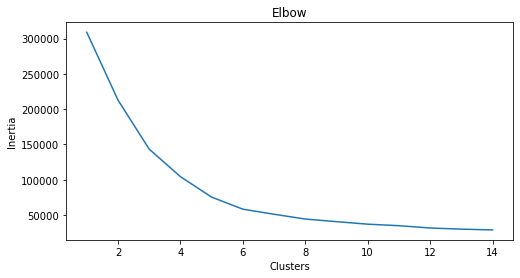

In [8]:
#plot to find elbow
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,15)),y=clusters)
ax.set_title("Elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


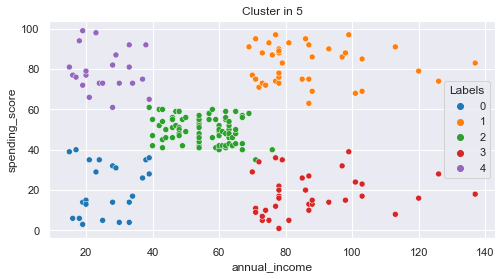

In [9]:
#Found elbow in 5

kme=KMeans(n_clusters=5).fit(ds)

ds['Labels']=kme.labels_ #plot label to ds

plt.figure(figsize=(8,4))
sns.set_theme()
sns.scatterplot(ds['annual_income'],ds['spending_score'],hue=ds['Labels'],
                palette=sns.color_palette('tab10', 5))
plt.title('Cluster in 5')
plt.show()

In [10]:
ds

,gender,age,annual_income,spending_score,Labels
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3
